In [13]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/'

lig_conc = pd.read_csv(workdir + '20230512_nir_conc.csv')

data = pd.read_csv(workdir + '20230512_nir_titri3.csv')

In [14]:
for name in lig_conc.columns[2:]:
    x = lig_conc[name][310:410]  - lig_conc[lig_conc.columns[1]][310:410]
    y = sum(x)/len(x)
    lig_conc[name] = lig_conc[name] - y

317


(-0.05, 0.2)

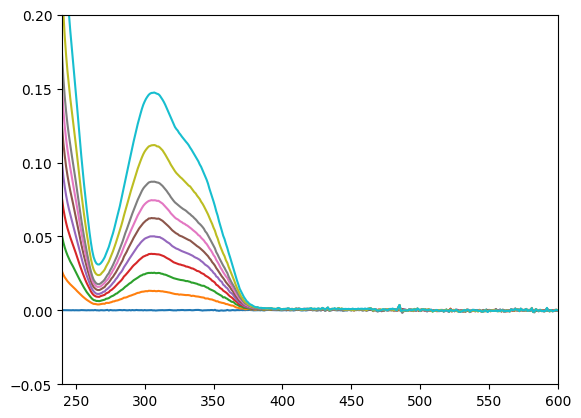

In [15]:
lig_adds = [0, 2, 4, 6, 8, 10, 12, 14, 18, 24]
lig_xs = [x*600/(2000+x) for x in lig_adds]

lig_ys = lig_conc.iloc[317-190, 1:]

print(lig_conc.iloc[317-190, 0])

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in lig_conc.columns[1:]:
    ax.plot(lig_conc[lig_conc.columns[0]], lig_conc[name])

plt.xlim([240, 600])
plt.ylim([-0.05, 0.2])


[[0.        ]
 [0.5994006 ]
 [1.19760479]
 [1.79461615]
 [2.39043825]
 [2.98507463]
 [3.57852883]
 [4.17080437]
 [5.3518335 ]
 [7.11462451]]
score: 
lig intercept_: 
lig coef_: 


(-0.05, 0.6)

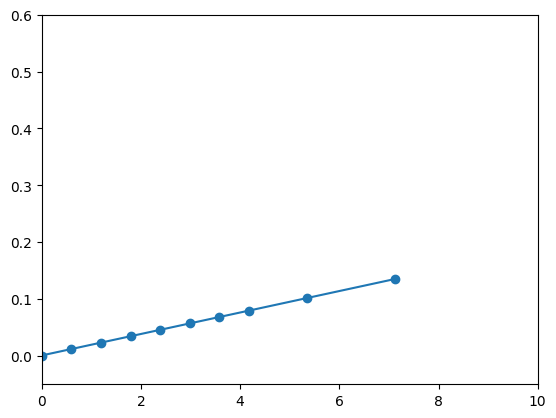

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
lig_xs_re = np.array(lig_xs).reshape(-1, 1)
lig_reg_317 = LinearRegression().fit(lig_xs_re, lig_ys)
print(lig_xs_re)
print('score: '.format(lig_reg_317.score(lig_xs_re, lig_ys)))
print('lig intercept_: '.format(lig_reg_317.intercept_))
print('lig coef_: '.format(lig_reg_317.coef_))

fig,ax = plt.subplots()
ax.scatter(lig_xs, lig_ys)
lig_ys_317_pred = np.array([lig_reg_317.predict(np.array(xr).reshape(1, -1)) for xr in lig_xs_re])

ax.plot(lig_xs_re, lig_ys_317_pred)
plt.xlim([0, 10])
plt.ylim([-0.05, 0.6])

In [17]:
for name in data.columns[2:]:
    x = data[name][310:410]  - data[data.columns[1]][310:410]
    y = sum(x)/len(x)
    data[name] = data[name] - y

In [18]:
data.columns

Index(['Wavelength [nm]', 'H2O', 'prot_10uM', 'nir_1', 'nir_2', 'nir_3',
       'nir_4', 'nir_5', 'nir_6', 'nir_7', 'nir_8', 'nir_9', 'nir_10',
       'nir_12', 'nir_14', 'nir_16', 'nir_18', 'nir_20', 'nir_22', 'nir_24'],
      dtype='object')

(-0.05, 0.2)

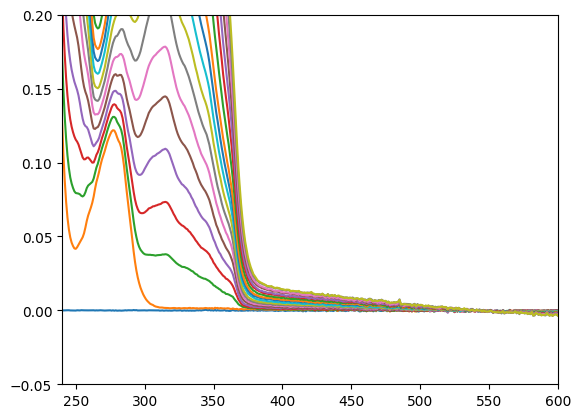

In [19]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 600])
plt.ylim([-0.05, 0.2])

titri_adds: 
18
[0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.05, 1.2, 1.35, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 3.6]
real_titri_ys
18


(-0.01, 0.1)

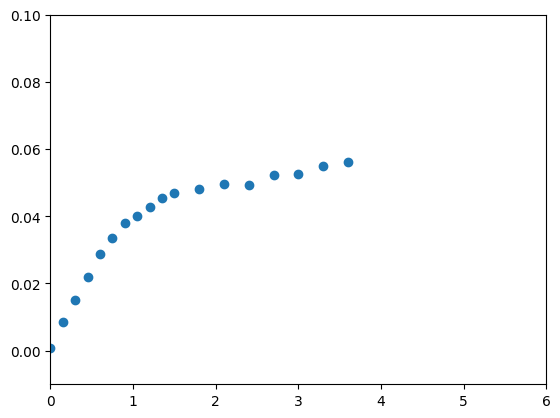

In [21]:
titri_adds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
#print('titri_adds-----------------------------------')
print('titri_adds: '.format(len(titri_adds)))
print(len(titri_adds))

ratio = [x*3000/500/40 for x in titri_adds]
print(ratio)

lig_titri_xs = np.array([x*3000/(x+2000) for x in titri_adds]).reshape(-1, 1)
#print('lig_titri_xs-----------------------------------')
#print(lig_titri_xs)

lig_titri_ys = lig_reg_317.predict(lig_titri_xs)
#print('lig_titri_ys-----------------------------------')
#print(lig_titri_ys)

real_titri_ys = data.iloc[317-190, 2:]
#print('real_titri_ys-----------------------------------')
print('real_titri_ys'.format(len(real_titri_ys)))
print(len(real_titri_ys))

corr_titri_ys = real_titri_ys - lig_titri_ys

fig,ax = plt.subplots()
ax.scatter(ratio, corr_titri_ys)


plt.xlim([0, 6])
plt.ylim([-0.01, 0.1])

In [ ]:
result = pd.DataFrame({'conc':titri_adds, 'abs':corr_titri_ys.values})
result.to_csv(workdir + 'nir_230418_processed.csv')